In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#starting with some ML we need to import some more packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate R² and MAE
from sklearn.metrics import r2_score, mean_absolute_error
#arch and garch
from arch import arch_model

# Traditional Volatility Methods

This will be where we do a final test of traditional non-ML methods that were used before we had things like linear regression, neural nets, etc. The models we will look at specifically are ARCH and GARCH

GARCH or Generalized Autoregressive Conditional Heteroskedasticity
* statistical model used to analyze and predict time-series data where variance of errors is not constant over time
* should be perfect for financial modeling

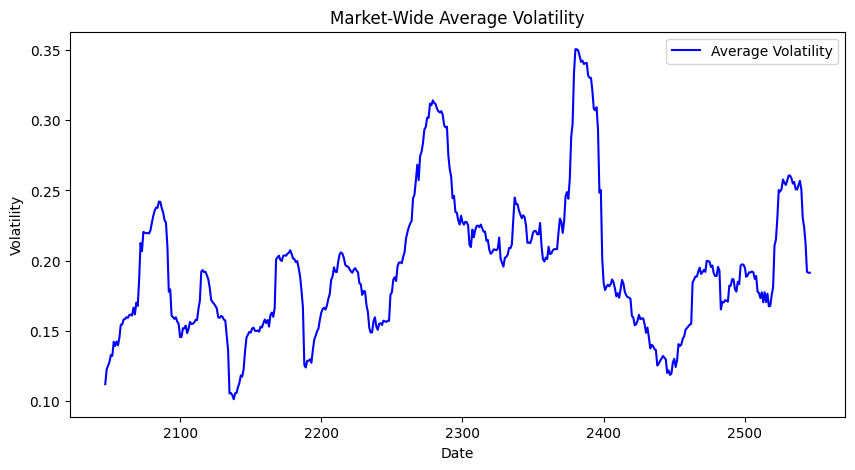

In [6]:
#Stock data preparation
# gather data
stockgrp = pd.read_excel("10yrClosingPricesStocks.xlsx")
stockgrp = stockgrp.drop(columns=['Date'])

#calculate log returns then volatility
returns = np.log(stockgrp / stockgrp.shift(1))
volatility = returns.rolling(window=20).std() * np.sqrt(252)
volatility = volatility.dropna()

#we will work with the average of our 18 stocks to fit a marketwide view
avg_volatility = volatility.mean(axis=1) 
avg_volatility = avg_volatility.to_frame()
avg_volatility.columns = ['volatility']

#if we want to see the full dataset
def plot_avg(data):
    plt.figure(figsize=(10,5))
    plt.plot(data, label="Average Volatility", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.title("Market-Wide Average Volatility")
    plt.legend()
    plt.show()
plot_avg(avg_volatility.tail(500))

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -885.343
Distribution:                  Normal   AIC:                           1778.69
Method:            Maximum Likelihood   BIC:                           1801.93
                                        No. Observations:                 2470
Date:                Mon, May 05 2025   Df Residuals:                     2469
Time:                        15:17:05   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9563  3.301e-02     59.270      0.000 [  1.892,  2.02

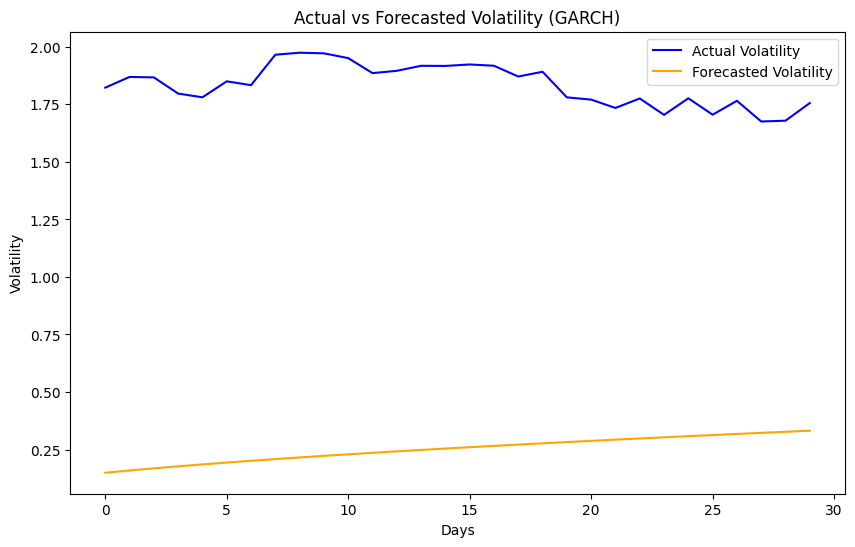

In [40]:
# Split the data
train_data = avg_volatility['volatility'][:2470]*10
test_data = avg_volatility['volatility'][2470:2500]*10

# Fit a GARCH(1,1) model to the training data
garch_model = arch_model(train_data, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# Forecast the next 100 days
forecast_horizon = 30
garch_forecast = garch_fit.forecast(horizon=forecast_horizon, reindex=False)

# Extract the forecasted volatility
forecasted_volatility = np.sqrt(garch_forecast.variance.values[-1, :])


r2 = r2_score(test_data.values, forecasted_volatility)
mae = mean_absolute_error(test_data.values, forecasted_volatility)

print(f"R²: {r2}")
print(f"MAE: {mae}")

# Plot actual vs forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(test_data.values, label="Actual Volatility", color="blue")
plt.plot(forecasted_volatility, label="Forecasted Volatility", color="orange")
plt.title("Actual vs Forecasted Volatility (GARCH)")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.legend()
plt.show()

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -962.251
Distribution:                  Normal   AIC:                           1932.50
Method:            Maximum Likelihood   BIC:                           1955.75
                                        No. Observations:                 2470
Date:                Mon, May 05 2025   Df Residuals:                     2469
Time:                        15:15:00   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.0075  1.974e-03   1017.073      0.000 [  2.004,  2.01

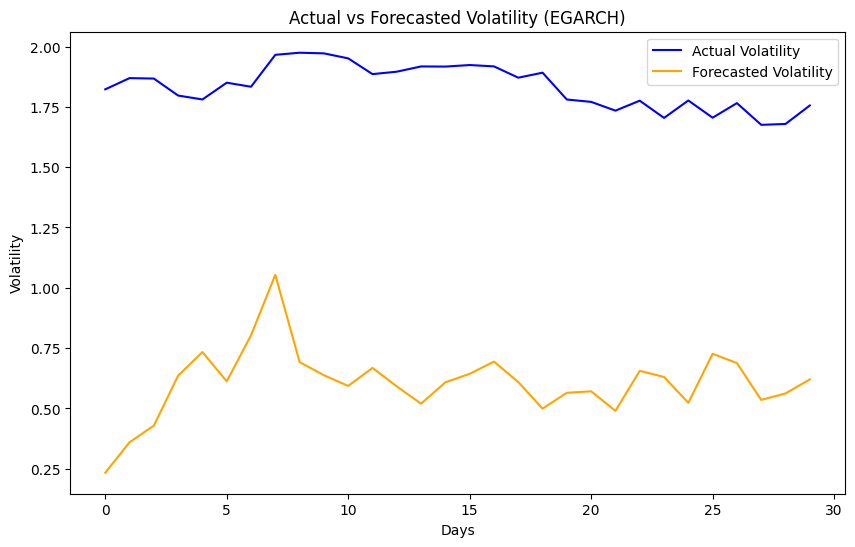

In [ ]:
#Now let's try egarch model
# Fit a EGARCH(1,1) model to the training data
egarch_model = arch_model(train_data, vol='EGarch', p=1, q=1)
egarch_fit = egarch_model.fit(disp="off")
print(egarch_fit.summary())

# Forecast the next 30 days
forecast_horizon = 30
egarch_forecast = egarch_fit.forecast(horizon=forecast_horizon, method='simulation')

# Extract the forecasted volatility
forecasted_volatility = np.sqrt(egarch_forecast.variance.values[-1, :])

r2 = r2_score(test_data.values, forecasted_volatility)
mae = mean_absolute_error(test_data.values, forecasted_volatility)

print(f"R²: {r2}")
print(f"MAE: {mae}")

# Plot actual vs forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(test_data.values, label="Actual Volatility", color="blue")
plt.plot(forecasted_volatility, label="Forecasted Volatility", color="orange")
plt.title("Actual vs Forecasted Volatility (EGARCH)")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.legend()
plt.show()